# Case: Predicting the total payment of insurance based on the no. of claims

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('insurance.csv')
df.head()

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194


### Applying Linear Regression :

##### Step -1: Assign x and y

x: independent variable: Number of claims

y:Dependent variable: Total payment (dependent on x)

In [4]:
x= df.iloc[:,:1]
y=df.iloc[:,1:]

##### Step-2: Visualise the data


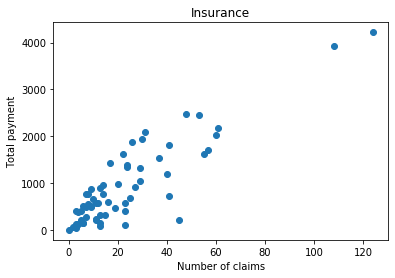

In [11]:
plt.scatter(x,y)
plt.title('Insurance')
plt.xlabel('Number of claims')
plt.ylabel('Total payment')
plt.show()

##### Step-3: Split the records for Training and testing:

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
print(len(x))
print(len(x_train),len(x_test))

63
50 13


Explanation: 

    train_test_split splits the data into 2 parts : for testing and training.
    
    test_size=0.2: This means that 20% of the data is for testing and the rest 80% is for training
    
    random_state=0: The data for test and train should be choosen randomly.
        

##### Step -4: Model building

###### 4.1 Train model:

In [51]:
 from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# a:
lin_reg.coef_

array([[32.18742386]])

In [27]:
#b
lin_reg.intercept_

array([164.67433032])

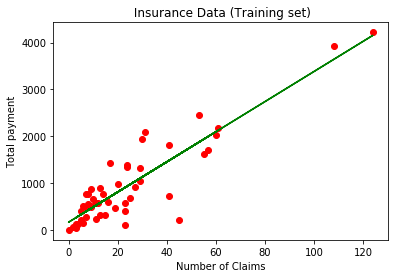

In [28]:
 #Visualise Training set result
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lin_reg.predict(x_train), color = 'green')
plt.title(' Insurance Data (Training set)')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment')
plt.show()

The green line represents(y') and red dots represent(y)

#### 4.2 : Test Model:

In [31]:
ypred=lin_reg.predict(x_test)  # the predictred values of y for the test dataset(x) 
ypred

array([[1355.60901327],
       [ 261.23660191],
       [1001.54735077],
       [ 583.11084055],
       [ 357.7988735 ],
       [ 872.79765532],
       [ 293.42402578],
       [ 518.73599282],
       [1709.67067577],
       [ 583.11084055],
       [ 293.42402578],
       [ 615.29826441],
       [1452.17128486]])

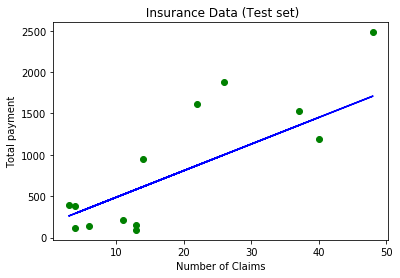

In [42]:
# Visualize the test model
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test,lin_reg.predict(x_test), color = 'blue')
plt.title(' Insurance Data (Test set)')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment')
plt.show()

The accuracy in test model is much low compared to train model.

##### Step 5: Estimate the cost:

In [43]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.6488832597282385
The RMSE value is........ 458.9314805249939


The R-square value is not too close to 1, so it is not a very good fit.

## How to predict the Total payment for unseen values of x: No. of claims:
        
        

In [46]:
unseen_pred = lin_reg.predict(np.array([[20]]))
unseen_pred

array([[808.42280759]])